<a href="https://colab.research.google.com/github/world970511/RIDIBOOKS_romance_webnovel_review_Sentiment_Analysis/blob/main/anlay_ridi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-06-07 12:26:16--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c3:9b0a, 2406:da00:ff00::22c2:513, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=uUMXe6qV%2BxZJ42s2PzZOIsfl9t0%3D&Expires=16230

In [ ]:
import pandas as pd
import numpy as np
import re
import urllib.request
from sklearn.model_selection import train_test_split


urllib.request.urlretrieve("https://raw.githubusercontent.com/world970511/RIDIBOOKS_romance_webnovel_review_Sentiment_Analysis/main/data/result_all_data.txt",
                        filename="result_all_data.txt")
all_data = pd.read_csv('result_all_data.txt',encoding='utf-8')
print(all_data)

print('\n===================\n')
print('초반 데이터 확인 :',len(all_data))
all_data.drop_duplicates(subset=['review'], inplace=True)#중복된 리뷰들을 제거한다
print('중복 제거 확인 :',len(all_data))

all_data = all_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print('null값이 존재하는가?=',all_data.isnull().values.any()) # Null 값이 존재하는지 확인
print('\n===================\n')

train_data, test_data = train_test_split(all_data, test_size = 0.25, random_state = 42)#3:1로 데이터 분할
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

print('\n===================\n')
train_data.groupby('rate').size().reset_index(name = 'count')
test_data.groupby('rate').size().reset_index(name = 'count')

train_data=train_data.fillna(" ")#훈련 데이터에서 한글과 공백을 제외하고 제거
train_data['review']=train_data['review'].apply(lambda x:re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","",x))
train_data['review']=train_data['review'].apply(lambda x:re.sub('^ +',"",x))
train_data['review'].replace('', np.nan, inplace=True)
train_data = train_data.dropna(how='any')
print('전처리 후 훈련용 샘플의 개수 :',len(train_data))

test_data=test_data.fillna(" ")#테스트 데이터에서 한글과 공백을 제외하고 제거
test_data['review']=test_data['review'].apply(lambda x:re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","",x))
test_data['review']=test_data['review'].apply(lambda x:re.sub('^ +',"",x))
test_data['review'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))
print('\n===================\n')



        rate                                             review
0          1  믿고 보는 작가님 짱  남주 여주 넘 좋아요  여주때문에 안달 못하는 모습도 재미있...
1          1                                        기대됩니다 잘읽을께용
2          0                                하아ㅜㅜ 진짜 남주가 로봇같아요ㅜㅜ
3          0   필력이 진짜... 없어요 이런 판타지 로맨스를 좋아해서 기대하면서 봤는데 휴......
4          0         갈수록 지루하고 유치해져요.  길지도 않은 책인데 끝까지 못읽고 포기했어요.
...      ...                                                ...
110863     1            재밋게 잘봣어요.ㅎ너무빨리읽어져서아쉽네요 작가님다른작품도 찾아봐야겟어요
110864     0  .개취라지만 납득안감..여주는 한장넘어갈때마다 울고 눈물흘리고..혼자 걷지도 못하는...
110865     1                              좋아하는 작가님 신작입니다! 기대돼요~
110866     1                                작가님 책 다 봤어요. 잼있어요~~
110867     0  ㅋㅋㅋ제목 잘못된수준이에요ㅋㅋ 꽃잎은 젖어든다가 아니라 젖어있다라던가 마를날이 없다...

[110868 rows x 2 columns]


초반 데이터 확인 : 110868
중복 제거 확인 : 110868
null값이 존재하는가?= False


훈련용 리뷰의 개수 : 83151
테스트용 리뷰의 개수 : 27717


전처리 후 훈련용 샘플의 개수 : 83100
전처리 후 테스트용 샘플의 개수 : 27697






단어 집합(vocabulary)의 크기 : 38313
등장 빈도가 1번 이하인 희귀 단어의 수: 16202
단어 집합에서 희귀 단어의 비율: 42.2885182575105
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.7351553254974844
단어 집합의 크기 : 22113
리뷰의 최대 길이 : 886
리뷰의 평균 길이 : 26.520914560770155


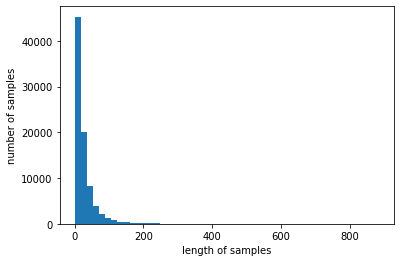

전체 샘플 중 길이가 90 이하인 샘플의 비율: 95.83152827918171


In [ ]:
import pandas as pd
import numpy as np
from konlpy.tag import Mecab
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

#MeCab-오픈 소스 형태소 분석 엔진.(품사 태깅/형태소 분리/명사에 해당하는 형태소만 추출 가능)
mecab = Mecab()
stopwords = ['의','가','이','은','들','는','좀','원','권','과','도','를','으로','자','에','와','한','하다','제','금','을','이']


train_data['tokenized'] = train_data['review'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data['tokenized'] = test_data['review'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])


print('\n===================\n')
#긍정 리뷰와 부정 리뷰에 등장하는 단어 빈도
negative_words = np.hstack(train_data[train_data.rate == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.rate == 1]['tokenized'].values)

X_train = train_data['tokenized'].values
y_train = train_data['rate'].values
X_test= test_data['tokenized'].values
y_test = test_data['rate'].values

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

#정수 인코딩 과정에서 이보다 큰 숫자가 부여된 단어들은 OOV로 변환
#'OOV'=단어 집합에 존재하지 않는 단어: Out-Of-Vocabulary(단어 집합에 없는 단어)의 약자
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

max_len = 90
below_threshold_len(max_len, X_train)

X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)



In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import urllib.request

model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

#검증 데이터 손실(val_loss)이 증가하면, 과적합 징후
#그래서 검증 데이터 손실이 4회 증가하면 학습을 조기 종료(Early Stopping)
#과적합(Over-fitting)-데이터가 너무 적합하게 학습이 되면서 생기는 문제. 학습 데이터에는 올바르게 반응하지만 신규 데이터는 처리하지 못하는 것
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=60, callbacks=[es, mc], batch_size=60, validation_split=0.2)

loaded_model = load_model('best_model.h5')
model.save('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

Epoch 1/60
1108/1108 [==============================] - 47s 41ms/step - loss: 0.2857 - acc: 0.8866 - val_loss: 0.2552 - val_acc: 0.9015

Epoch 00001: val_acc improved from -inf to 0.90150, saving model to best_model.h5
Epoch 2/60
1108/1108 [==============================] - 45s 41ms/step - loss: 0.2205 - acc: 0.9177 - val_loss: 0.2279 - val_acc: 0.9114

Epoch 00002: val_acc improved from 0.90150 to 0.91137, saving model to best_model.h5
Epoch 3/60
1108/1108 [==============================] - 45s 41ms/step - loss: 0.1953 - acc: 0.9277 - val_loss: 0.2263 - val_acc: 0.9154

Epoch 00003: val_acc improved from 0.91137 to 0.91540, saving model to best_model.h5
Epoch 4/60
1108/1108 [==============================] - 45s 41ms/step - loss: 0.1786 - acc: 0.9357 - val_loss: 0.2128 - val_acc: 0.9200

Epoch 00004: val_acc improved from 0.91540 to 0.91998, saving model to best_model.h5
Epoch 5/60
1108/1108 [==============================] - 45s 41ms/step - loss: 0.1657 - acc: 0.9408 - val_loss: 0.21

In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

  
if __name__ == "__main__": 
  while(True):
    new_sentence=input("리뷰 테스트(종료하고 싶다면 n을 쳐주세요):")
    if  new_sentence !='n':
      try:
        sentiment_predict(new_sentence) 
      except:
        break
        print('stop')
    else: break

리뷰 테스트(종료하고 싶다면 n을 쳐주세요):내용은 좋은데 서술이 너무 길어서 읽기 어려워요
90.16% 확률로 부정 리뷰입니다.

리뷰 테스트(종료하고 싶다면 n을 쳐주세요):서술이 길어서 읽기는 어려운데 재미있어요
91.73% 확률로 긍정 리뷰입니다.

리뷰 테스트(종료하고 싶다면 n을 쳐주세요):가격만큼 한 권 분량이 많아요. 여태까지 분량 많은 건 좋은 거라고 생각했는데 맙소사ㅠㅠ 길어도 정~말 길어요. 읽기 힘들 정도로... 약탈 마드모아젤에서 나가떨어진 후에 궁금해서 또 결제했는데ㅋㅋ큐ㅠㅠㅠ 역시는 역시입니다. 삽화 예쁘고 표지도 예쁘지만 큰 화제 없이 한 권이 소비되는 거 싫어하시는 분들은 비추ㅠㅜ 근데 등장인물들 제외하고 황실, 그랑데스 가문들, 그 외 지역명이나 배경, 풍경 묘사같은 건 정말 좋았어요! 작가님께서 공들여 쓰신 게 보여서 제 지친 마음과는 별개로 별점은 잘 드리고 싶어요
99.08% 확률로 긍정 리뷰입니다.

리뷰 테스트(종료하고 싶다면 n을 쳐주세요):처음엔 정말 재밌었는데 3-7권이 진짜 힘듭니다.... 두 권은 줄여서 빼버렸어도 됐을 듯. 8권을 다 읽은 감상이 아 재밌었다가 아니고 아이고 힘들다일 정도에요. 중간에 작가님도 지치셨는지 온 세계관이 종이인형들처럼 짜놓은 반응...여주를 위한 세계차럼 돌아가는데 그것도 버텨내기 힘듭니다. 덕분에 적당한 생략은 미덕임을 알았네요. 작가님의 전작은 큰 문제 없이 재밌게 봤는데 말이죠. 그리고 무종교인으로서 성경 인용이 너무 강해서 좀 그랬습니다. 성경을 오마쥬한 정도가 아니고 그냥 이 글 자체가 성경을 기반으로 하고 있어요. 저는 부담스러웠습니다.
72.49% 확률로 부정 리뷰입니다.

리뷰 테스트(종료하고 싶다면 n을 쳐주세요):처음엔 정말 재밌었는데 3-7권이 진짜 힘듭니다.... 두 권은 줄여서 빼버렸어도 됐을 듯. 8권을 다 읽은 감상이 아 재밌었다가 아니고 아이고 힘들다일 정도에요. 중간에 작가님도 지치셨는지 온 세계관이 종이인형들처럼 짜놓은 반응... 덕분에 적당한 생략